In [109]:
# pip install pyproj

# Create Data 
* Correcting involved_markers_hebrew
* Create data for TA
* Convert and Create latitude and longitude to EPSG 32636
* Map to make sure accident in the align to BP
* Correcting BP data

In [110]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

import pyproj

## Loading fixed street names

In [111]:
street_names_table = pd.read_csv('./csv_tables/street_names_table.csv')
street_names_table

i_m_h_street_name      ta_street fixed_street_name
0                   אב             אב                אב
1        אבא ושרה נאמן  נאמן אבא ושרה     אבא ושרה נאמן
2              אבודרהם        אבודרהם           אבודרהם
3             אבולעפיה       אבולעפיה          אבולעפיה
4                אבוקה          אבוקה             אבוקה
...                ...            ...               ...
1334           שד רוקח     רוקח ישראל           שד רוקח
1335      שד שאול המלך      שאול המלך      שד שאול המלך
1336      שד ששת הימים      ששת הימים      שד ששת הימים
1337              שד"ל           שד"ל              שד"ל
1338         שד' תרס"ט          תרס"ט         שד' תרס"ט

[1339 rows x 3 columns]

In [112]:
street_names_table[street_names_table.fixed_street_name == 'שד שאול המלך']

i_m_h_street_name  ta_street fixed_street_name
1335      שד שאול המלך  שאול המלך      שד שאול המלך

## Loading **involved_markers_hebrew** and Fixing:
* Date
* Dropping columns

In [113]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


In [114]:
i_m_h = pd.read_csv('./csv_tables/original_csv_tables/involved_markers_hebrew.csv')

C:\Users\itay8\AppData\Local\Temp\ipykernel_10164\1916716407.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h = pd.read_csv('./csv_tables/original_csv_tables/involved_markers_hebrew.csv')


In [115]:
i_m_h

accident_id  provider_and_id  provider_code  file_type_police  \
0         2013004888      32013004888              3                 3   
1         2013004932      32013004932              3                 3   
2         2013005101      32013005101              3                 3   
3         2013005103      32013005103              3                 3   
4         2013005186      32013005186              3                 3   
...              ...              ...            ...               ...   
1560494   2024099935      32024099935              3                 3   
1560495   2024099930      32024099930              3                 3   
1560496   2024099655      32024099655              3                 3   
1560497   2024099655      32024099655              3                 3   
1560498   2024099518      32024099518              3                 3   

         involved_type involved_type_hebrew  license_acquiring_date  \
0                    1                  נהג                    1969   
1                    1                  נהג                    1992   
2                    2             נהג נפגע                    2008   
3                    2             נהג נפגע                    1999   
4                    1                  נהג                    2009   
...                ...                  ...                     ...   
1560494              2             נהג נפגע                    2019   
1560495              3                 נפגע                       0   
1560496              3                 נפגע                       0   
1560497              3                 נפגע                       0   
1560498              3                 נפגע                       0   

         age_group age_group_hebrew  sex  ... vehicle_attribution_hebrew  \
0               13            60-64    1  ...                     ישראלי   
1                9            40-44    1  ...                     ישראלי   
2               10            45-49    1  ...                     משטרתי   
3                8            35-39    1  ...                     ישראלי   
4                6            25-29    1  ...                     ישראלי   
...            ...              ...  ...  ...                        ...   
1560494          5            20-24    2  ...                     ישראלי   
1560495         16            75-79    2  ...                        NaN   
1560496         13            60-64    2  ...                        NaN   
1560497         12            55-59    1  ...                        NaN   
1560498          2            05-09    1  ...                        NaN   

         seats total_weight  total_weight_hebrew vehicle_vehicle_type  \
0         99.0          1.0               עד 1.9                  1.0   
1          3.0          1.0               עד 1.9                  1.0   
2         99.0          0.0              לא ידוע                  8.0   
3         99.0          1.0               עד 1.9                 10.0   
4          3.0          1.0               עד 1.9                  2.0   
...        ...          ...                  ...                  ...   
1560494    3.0          1.0               עד 1.9                  1.0   
1560495    NaN          NaN                  NaN                  NaN   
1560496    NaN          NaN                  NaN                  NaN   
1560497    NaN          NaN                  NaN                  NaN   
1560498    NaN          NaN                  NaN                  NaN   

            vehicle_vehicle_type_hebrew vehicle_damage  vehicle_damage_hebrew  \
0                       רכב נוסעים פרטי            4.0                אין נזק   
1                       רכב נוסעים פרטי            1.0                     קל   
2                     אופנוע עד 50 סמ"ק            1.0                     קל   
3                אופנוע 126 עד 400 סמ"ק            4.0                אין נזק   
4        משא עד 3.5 טון - אחוד (טרנזיט)            4.0                אי

Fixing Date

In [116]:
i_m_h['accident_date'] = pd.to_datetime(
    i_m_h['accident_year'].astype(str) + '-' + 
    i_m_h['accident_month'].astype(str) + '-' + 
    i_m_h['accident_day'].astype(str) + ' ' + 
    i_m_h['accident_hour'].astype(str) + ':' + 
    i_m_h['accident_minute'].astype(str)
)

Dropping duplicated columns

In [117]:
i_m_h.drop(columns=['vehicle_vehicle_type','vehicle_vehicle_type_hebrew'], inplace=True)

In [118]:
i_m_h.to_csv('./csv_tables/involved_markers_hebrew_corrected.csv', index=False)

Fixing street names

In [119]:
i_m_h[i_m_h.street2_hebrew == "אבן ג'נאח"]

accident_id  provider_and_id  provider_code  file_type_police  \
988273   2020003157      12020003157              1                 1   
988274   2020003157      12020003157              1                 1   

        involved_type involved_type_hebrew  license_acquiring_date  age_group  \
988273              1                  נהג                    2001          9   
988274              3                 נפגע                       0         15   

       age_group_hebrew  sex  ... vehicle_attribution  \
988273            40-44    1  ...                 1.0   
988274            70-74    2  ...                 1.0   

        vehicle_attribution_hebrew seats  total_weight total_weight_hebrew  \
988273                      ישראלי  34.0          11.0           16.0-19.0   
988274                      ישראלי  34.0          11.0           16.0-19.0   

        vehicle_damage vehicle_damage_hebrew  urban_intersection house_number  \
988273             4.0               אין נזק           9410426.0          NaN   
988274             4.0               אין נזק           9410426.0          NaN   

             accident_date  
988273 2020-07-20 17:00:00  
988274 2020-07-20 17:00:00  

[2 rows x 162 columns]

In [120]:
# getting i_m_h street names

i_m_h_street_names_to_fix = street_names_table.i_m_h_street_name.to_list()
fix_street_names          = street_names_table.fixed_street_name.to_list()

i_m_h['street1_hebrew'] = i_m_h['street1_hebrew'].replace(i_m_h_street_names_to_fix, fix_street_names)

i_m_h['street2_hebrew'] = i_m_h['street2_hebrew'].replace(i_m_h_street_names_to_fix, fix_street_names)



In [121]:
i_m_h[i_m_h.street2_hebrew == "אבן ג'נאח"]

Empty DataFrame
Columns: [accident_id, provider_and_id, provider_code, file_type_police, involved_type, involved_type_hebrew, license_acquiring_date, age_group, age_group_hebrew, sex, sex_hebrew, involve_vehicle_type, involve_vehicle_type_hebrew, safety_measures, safety_measures_hebrew, involve_yishuv_symbol, involve_yishuv_name, injury_severity, injury_severity_hebrew, injured_type, injured_type_hebrew, injured_position, injured_position_hebrew, population_type, population_type_hebrew, involve_home_region, involve_home_region_hebrew, involve_home_district, involve_home_district_hebrew, involve_home_natural_area, involve_home_natural_area_hebrew, involve_home_municipal_status, involve_home_municipal_status_hebrew, involve_home_yishuv_shape, involve_home_yishuv_shape_hebrew, hospital_time, hospital_time_hebrew, medical_type, medical_type_hebrew, release_dest, release_dest_hebrew, safety_measures_use, safety_measures_use_hebrew, late_deceased, late_deceased_hebrew, car_id, involve_id, accident_year, accident_month, provider_code_hebrew, accident_timestamp, accident_type, accident_type_hebrew, accident_severity, accident_severity_hebrew, location_accuracy, location_accuracy_hebrew, road_type, road_type_hebrew, road_shape, road_shape_hebrew, day_type, day_type_hebrew, police_unit, police_unit_hebrew, one_lane, one_lane_hebrew, multi_lane, multi_lane_hebrew, speed_limit, speed_limit_hebrew, road_intactness, road_intactness_hebrew, road_width, road_width_hebrew, road_sign, road_sign_hebrew, road_light, road_light_hebrew, road_control, road_control_hebrew, weather, weather_hebrew, road_surface, road_surface_hebrew, road_object, road_object_hebrew, object_distance, object_distance_hebrew, didnt_cross, didnt_cross_hebrew, cross_mode, cross_mode_hebrew, cross_location, cross_location_hebrew, cross_direction, cross_direction_hebrew, road1, road2, km, ...]
Index: []

[0 rows x 162 columns]

In [122]:
i_m_h.to_csv('./csv_tables/involved_markers_hebrew_corrected.csv', index=False)

## Create TA Data



In [123]:
i_m_h = pd.read_csv('./csv_tables/involved_markers_hebrew_corrected.csv')

C:\Users\itay8\AppData\Local\Temp\ipykernel_10164\3865934326.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h = pd.read_csv('./csv_tables/involved_markers_hebrew_corrected.csv')


In [124]:
i_m_h[i_m_h.accident_yishuv_symbol == 5000].copy().to_csv('./csv_tables/i_m_h_ta.csv', index=False)

## Converting Latitude and Longitude to EPSG 32636

In [125]:
i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')
i_m_h_ta

C:\Users\itay8\AppData\Local\Temp\ipykernel_10164\1775048707.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')


accident_id  provider_and_id  provider_code  file_type_police  \
0        2013006051      32013006051              3                 3   
1        2013006342      32013006342              3                 3   
2        2013004571      32013004571              3                 3   
3        2013005050      32013005050              3                 3   
4        2013005018      32013005018              3                 3   
...             ...              ...            ...               ...   
115228   2024099732      32024099732              3                 3   
115229   2024099919      32024099919              3                 3   
115230   2024099919      32024099919              3                 3   
115231   2024099614      32024099614              3                 3   
115232   2024099552      32024099552              3                 3   

        involved_type involved_type_hebrew  license_acquiring_date  age_group  \
0                   2             נהג נפגע                    2003          7   
1                   2             נהג נפגע                    2003          6   
2                   3                 נפגע                       0          5   
3                   2             נהג נפגע                    1996          8   
4                   2             נהג נפגע                    1975         12   
...               ...                  ...                     ...        ...   
115228              2             נהג נפגע                       0          6   
115229              1                  נהג                    1983         12   
115230              3                 נפגע                       0         99   
115231              2             נהג נפגע                    2013          6   
115232              3                 נפגע                       0         14   

       age_group_hebrew  sex  ... vehicle_attribution  \
0                 30-34    2  ...                 1.0   
1                 25-29    2  ...                 1.0   
2                 20-24    2  ...                 NaN   
3                 35-39    1  ...                 1.0   
4                 55-59    2  ...                 1.0   
...                 ...  ...  ...                 ...   
115228            25-29    1  ...                15.0   
115229            55-59    1  ...                 1.0   
115230          לא ידוע    0  ...                 1.0   
115231            25-29    1  ...                 1.0   
115232            65-69    2  ...                 1.0   

        vehicle_attribution_hebrew seats  total_weight total_weight_hebrew  \
0                           ישראלי   4.0           NaN                 NaN   
1                           ישראלי  99.0           1.0              עד 1.9   
2                              NaN   NaN           NaN                 NaN   
3                           ישראלי   3.0           1.0              עד 1.9   
4                           ישראלי   3.0           1.0              עד 1.9   
...                            ...   ...           ...                 ...   
115228                         NaN  99.0           0.0             לא ידוע   
115229                      ישראלי  43.0          13.0           26.0-30.0   
115230                      ישראלי  43.0          13.0           26.0-30.0   
115231                      ישראלי   1.0           NaN                 NaN   
115232                      ישראלי  99.0           0.0             לא ידוע   

        vehicle_damage vehicle_damage_hebrew  urban_intersection house_number  \
0                  1.0                    קל                 NaN        152.0   
1                  1.0                    קל                 NaN       9999.0   
2                  NaN                   NaN           8910433.0          NaN   
3                  1.0                    קל                 NaN       9999.0   
4                  4.0               אין נזק                 NaN          3.0   
...                ...                   ...      

In [126]:
i_m_h_ta[i_m_h_ta.accident_year == 2024].accident_month.value_counts()

accident_month
7     782
5     717
3     646
6     632
9     597
8     573
1     573
4     569
2     563
11    459
10    443
Name: count, dtype: int64

In [127]:
wgs_legion = pyproj.Transformer.from_crs('EPSG: 4326', 'EPSG:32636')


correct_epsg = []
for row in i_m_h_ta.iterrows():
    legion = wgs_legion.transform(row[1]['latitude'], row[1]['longitude'])
    correct_epsg.append(Point(legion))

i_m_h_ta_gdf = gpd.GeoDataFrame(
    i_m_h_ta,
    crs='EPSG:32636',
    geometry=correct_epsg
)

i_m_h_ta_gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Map to make sure accidents are in the correct place

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))

i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

## Making sure TA Bicycle Path Aligns with i_m_h_ta_gdf

In [130]:
# Load the BP
bicycle_paths = gpd.read_file("./csv_tables/tel_aviv_bp/Bicycle Routes.shp")

In [131]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

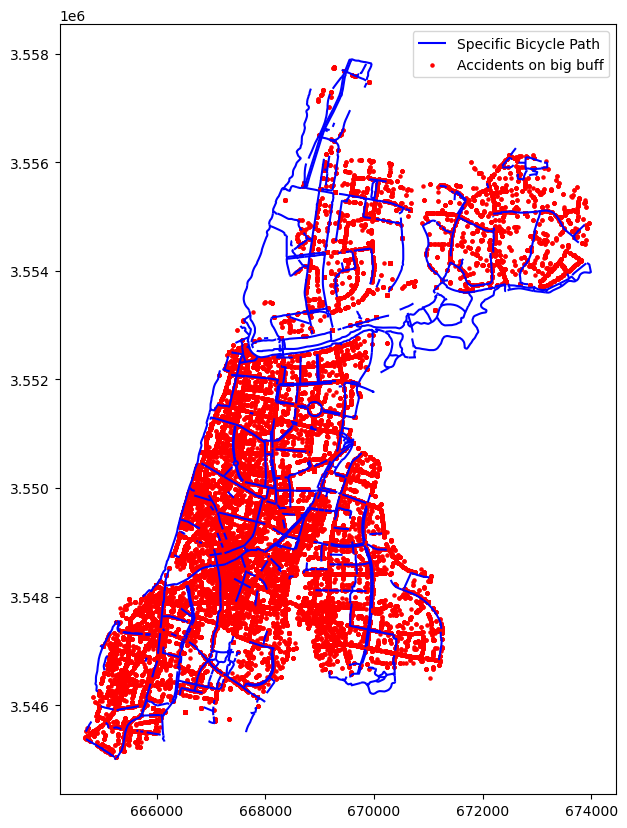

In [132]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )


plt.legend()
plt.show()

## Create Micro Mobility Data

In [133]:
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23

micro_m = [SCOOTER, E_BICYCLE, BICYCLE]

In [134]:
i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].head()

accident_id  provider_and_id  provider_code  file_type_police  \
9    2013007807      32013007807              3                 3   
16   2013007267      32013007267              3                 3   
22   2013007376      32013007376              3                 3   
45   2013008617      12013008617              1                 1   
47   2013007701      32013007701              3                 3   

    involved_type involved_type_hebrew  license_acquiring_date  age_group  \
9               2             נהג נפגע                       0          3   
16              2             נהג נפגע                       0          8   
22              2             נהג נפגע                       0         99   
45              2             נהג נפגע                       0          9   
47              2             נהג נפגע                       0         12   

   age_group_hebrew  sex  ... vehicle_attribution_hebrew  seats total_weight  \
9             10-14    2  ...                     ישראלי   99.0          0.0   
16            35-39    2  ...                   לא מנועי   99.0          0.0   
22          לא ידוע    0  ...                     ישראלי   99.0          0.0   
45            40-44    1  ...                     ישראלי   99.0          0.0   
47            55-59    1  ...                     ישראלי   99.0          0.0   

    total_weight_hebrew vehicle_damage  vehicle_damage_hebrew  \
9               לא ידוע            4.0                אין נזק   
16              לא ידוע            4.0                אין נזק   
22              לא ידוע            4.0                אין נזק   
45              לא ידוע            4.0                אין נזק   
47              לא ידוע            1.0                     קל   

   urban_intersection  house_number        accident_date  \
9                 NaN          17.0  2013-11-13 07:45:00   
16                NaN         100.0  2013-03-21 07:30:00   
22                NaN        9999.0  2013-10-15 07:45:00   
45         80150620.0           NaN  2013-01-27 08:00:00   
47                NaN        9999.0  2013-08-15 07:45:00   

                          geometry  
9   POINT (669346.843 3554808.438)  
16  POINT (667430.497 3550607.707)  
22  POINT (667639.600 3548303.692)  
45  POINT (668252.144 3549651.377)  
47  POINT (665986.377 3548206.911)  

[5 rows x 163 columns]

In [135]:
i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].to_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')

In [136]:
i_m_h_ta_gdf.to_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

## Correcting Bicycle Paths

* Merge with meta data

In [137]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


In [138]:
bicycle_paths

oidshvil  width                                  shemmikta direction  \
0         1.0    2.5                       נמיר מיוניצ'מן דרומה   דו סטרי   
1         2.0    2.5                 פרופס מנמיר עד קדושי השואה   דו סטרי   
2         3.0    2.1   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס   דו סטרי   
3         4.0    2.5                   קק"ל מנמיר עד חיים לבנון   דו סטרי   
4         5.0    2.0  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר   דו סטרי   
..        ...    ...                                        ...       ...   
904     504.0    NaN                                       None      None   
905     505.0    NaN                                       None      None   
906     506.0    2.5                       1063 (הטייסים-השלום(   דו סטרי   
907     507.0    2.5         הגדוד העברי (בני ברק - הגדוד העברי   דו סטרי   
908     508.0    2.5                                  החמשונאים   דו סטרי   

     bitzua  msorech miflas datecreate           dateimport  ShapeLengt  \
0    2012.0    95.10   None       None  25/05/2025 00:30:41   95.096756   
1    2013.0   201.14   None       None  25/05/2025 00:30:41  201.144518   
2    2004.0   696.31   None       None  25/05/2025 00:30:41  696.314765   
3    2018.0   659.20  מדרכה       None  25/05/2025 00:30:41  659.202874   
4    2018.0   362.67   None       None  25/05/2025 00:30:41  362.671242   
..      ...      ...    ...        ...                  ...         ...   
904     NaN   114.48   None       None  25/05/2025 00:30:41  114.483972   
905     NaN   386.14   None       None  25/05/2025 00:30:41  386.137363   
906  2025.0   322.10  מדרכה       None  25/05/2025 00:30:41  322.103518   
907  2025.0    88.03   כביש       None  25/05/2025 00:30:41   88.032714   
908  2025.0    40.12   כביש       None  25/05/2025 00:30:41   40.119598   

                                              geometry  
0    LINESTRING (669823.985 3557373.860, 669855.549...  
1    LINESTRING (669232.834 3555478.027, 669169.381...  
2    LINESTRING (669232.637 3555478.023, 669249.025...  
3    LINESTRING (669354.261 3555417.055, 669410.178...  
4    LINESTRING (669946.350 3555344.516, 669962.261...  
..                                                 ...  
904  LINESTRING (667809.270 3545866.365, 667815.263...  
905  LINESTRING (667803.810 3545852.001, 667788.493...  
906  LINESTRING (670555.420 3548148.112, 670556.069...  
907  LINESTRING (667882.970 3548334.371, 667897.721...  
908  LINESTRING (668688.309 3549497.472, 668680.686...  

[909 rows x 11 columns]

In [139]:
bicycle_paths

oidshvil  width                                  shemmikta direction  \
0         1.0    2.5                       נמיר מיוניצ'מן דרומה   דו סטרי   
1         2.0    2.5                 פרופס מנמיר עד קדושי השואה   דו סטרי   
2         3.0    2.1   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס   דו סטרי   
3         4.0    2.5                   קק"ל מנמיר עד חיים לבנון   דו סטרי   
4         5.0    2.0  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר   דו סטרי   
..        ...    ...                                        ...       ...   
904     504.0    NaN                                       None      None   
905     505.0    NaN                                       None      None   
906     506.0    2.5                       1063 (הטייסים-השלום(   דו סטרי   
907     507.0    2.5         הגדוד העברי (בני ברק - הגדוד העברי   דו סטרי   
908     508.0    2.5                                  החמשונאים   דו סטרי   

     bitzua  msorech miflas datecreate           dateimport  ShapeLengt  \
0    2012.0    95.10   None       None  25/05/2025 00:30:41   95.096756   
1    2013.0   201.14   None       None  25/05/2025 00:30:41  201.144518   
2    2004.0   696.31   None       None  25/05/2025 00:30:41  696.314765   
3    2018.0   659.20  מדרכה       None  25/05/2025 00:30:41  659.202874   
4    2018.0   362.67   None       None  25/05/2025 00:30:41  362.671242   
..      ...      ...    ...        ...                  ...         ...   
904     NaN   114.48   None       None  25/05/2025 00:30:41  114.483972   
905     NaN   386.14   None       None  25/05/2025 00:30:41  386.137363   
906  2025.0   322.10  מדרכה       None  25/05/2025 00:30:41  322.103518   
907  2025.0    88.03   כביש       None  25/05/2025 00:30:41   88.032714   
908  2025.0    40.12   כביש       None  25/05/2025 00:30:41   40.119598   

                                              geometry  
0    LINESTRING (669823.985 3557373.860, 669855.549...  
1    LINESTRING (669232.834 3555478.027, 669169.381...  
2    LINESTRING (669232.637 3555478.023, 669249.025...  
3    LINESTRING (669354.261 3555417.055, 669410.178...  
4    LINESTRING (669946.350 3555344.516, 669962.261...  
..                                                 ...  
904  LINESTRING (667809.270 3545866.365, 667815.263...  
905  LINESTRING (667803.810 3545852.001, 667788.493...  
906  LINESTRING (670555.420 3548148.112, 670556.069...  
907  LINESTRING (667882.970 3548334.371, 667897.721...  
908  LINESTRING (668688.309 3549497.472, 668680.686...  

[909 rows x 11 columns]

In [140]:
import geopandas as gpd

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_aviv_bp/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date','ShapeLengt', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(-1).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
# bicycle_paths.crs
bicycle_paths
# bicycle_paths['street_name'] = clean_st_names # can't fix names cause there are new BP and not sure where they go, so lets try to handle it as is

# bp = bicycle_paths.to_crs(epsg=4326)
# bicycle_paths

oid_shvil  msorech                                 dateimport    width  \
0            1      2.5                       נמיר מיוניצ'מן דרומה  דו סטרי   
1            2      2.5                 פרופס מנמיר עד קדושי השואה  דו סטרי   
2            3      2.1   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס  דו סטרי   
3            4      2.5                   קק"ל מנמיר עד חיים לבנון  דו סטרי   
4            5      2.0  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר  דו סטרי   
..         ...      ...                                        ...      ...   
904        504      NaN                                       None     None   
905        505      NaN                                       None     None   
906        506      2.5                       1063 (הטייסים-השלום(  דו סטרי   
907        507      2.5         הגדוד העברי (בני ברק - הגדוד העברי  דו סטרי   
908        508      2.5                                  החמשונאים  דו סטרי   

     direction  create_year shemmikta miflas          create_date  ShapeLengt  \
0       2012.0           95      None   None  25/05/2025 00:30:41   95.096756   
1       2013.0          201      None   None  25/05/2025 00:30:41  201.144518   
2       2004.0          696      None   None  25/05/2025 00:30:41  696.314765   
3       2018.0          659     מדרכה   None  25/05/2025 00:30:41  659.202874   
4       2018.0          362      None   None  25/05/2025 00:30:41  362.671242   
..         ...          ...       ...    ...                  ...         ...   
904        NaN          114      None   None  25/05/2025 00:30:41  114.483972   
905        NaN          386      None   None  25/05/2025 00:30:41  386.137363   
906     2025.0          322     מדרכה   None  25/05/2025 00:30:41  322.103518   
907     2025.0           88      כביש   None  25/05/2025 00:30:41   88.032714   
908     2025.0           40      כביש   None  25/05/2025 00:30:41   40.119598   

                                              geometry  
0    LINESTRING (669823.985 3557373.860, 669855.549...  
1    LINESTRING (669232.834 3555478.027, 669169.381...  
2    LINESTRING (669232.637 3555478.023, 669249.025...  
3    LINESTRING (669354.261 3555417.055, 669410.178...  
4    LINESTRING (669946.350 3555344.516, 669962.261...  
..                                                 ...  
904  LINESTRING (667809.270 3545866.365, 667815.263...  
905  LINESTRING (667803.810 3545852.001, 667788.493...  
906  LINESTRING (670555.420 3548148.112, 670556.069...  
907  LINESTRING (667882.970 3548334.371, 667897.721...  
908  LINESTRING (668688.309 3549497.472, 668680.686...  

[909 rows x 11 columns]

### Loading Meta Data

In [142]:
# Path to your Excel file
excel_file_path = "./csv_tables/tel_aviv_bp/export.xlsx"

# Load the Excel file
bicycle_paths_meta_data = pd.read_excel(excel_file_path, engine='openpyxl')

bicycle_paths_meta_data.bitzua = bicycle_paths_meta_data.bitzua.fillna(-1).astype(int)
# Display the first few rows of the dataframe
bicycle_paths_meta_data[~bicycle_paths_meta_data.date_created.isna()]


oid_shvil  width                                 shem_mikta direction  \
4            5    2.0  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר   דו סטרי   
15          16    3.5                      פארק הירקון שביל 7.10   דו סטרי   
29          30    1.6              נמיר מהרב גורן עד דורי שביל 7       NaN   
37          38    2.0  מרמורק מזרח מאבן גבירול עד הוברמן (מחודש)       NaN   
73          74    2.4                קרליבך מ- 454 עד ביליס מנחם   דו סטרי   
..         ...    ...                                        ...       ...   
494        495    2.5                    אנילביץ (וינגייט-חניון)   דו סטרי   
495        496    2.5                                  קיר הקריה   דו סטרי   
500        501    2.5                                  פנחס לבון   דו סטרי   
505        506    2.5                       1063 (הטייסים-השלום(   דו סטרי   
506        507    2.5         הגדוד העברי (בני ברק - הגדוד העברי   דו סטרי   

     bitzua  ms_orech miflas date_created          date_import  Shape_Length  
4      2018    362.67    NaN   30/06/2018  25/05/2025 00:30:41    362.671242  
15     2022   1853.03  מדרכה   01/01/2022  25/05/2025 00:30:41   1853.029646  
29     2021    914.42   כביש   01/09/2021  25/05/2025 00:30:41    914.424526  
37     2021    200.08   כביש   29/04/2021  25/05/2025 00:30:41    200.076574  
73     2021    164.29   כביש   01/12/2021  25/05/2025 00:30:41    164.285463  
..      ...       ...    ...          ...                  ...           ...  
494    2025    139.76   כביש   10/03/2025  25/05/2025 00:30:41    139.757216  
495    2025    156.67   כביש   01/03/2025  25/05/2025 00:30:41    156.669348  
500    2025    265.08   כביש   20/04/2025  25/05/2025 00:30:41    265.081788  
505    2025    322.10  מדרכה   20/04/2025  25/05/2025 00:30:41    322.103518  
506    2025     88.03   כביש   20/04/2025  25/05/2025 00:30:41     88.032714  

[220 rows x 10 columns]

In [143]:
#   oid_shvil	ms_orech	date_import	width	    direction	bitzua	    shem_mikta	miflas	        date_created
# 	oid_shvil	width	    shem_mikta	direction	bitzua	    ms_orech	miflas	    date_created	date_import	Shape_Length

### Merging bicycle paths with meta data

In [144]:
bicycle_paths_and_meta_data = pd.merge(bicycle_paths, bicycle_paths_meta_data, how='right', on='oid_shvil')
bicycle_paths_and_meta_data.drop(columns=['width_x','width_y','direction_x','miflas_x','ms_orech','date_import','shem_mikta'], inplace=True)

#                                       oid_shvil	msorech	 dateimport	   create_year	 shemmikta	 create_date	ShapeLengt	geometry	width_y	direction_y	bitzua	miflas_y	date_created	Shape_Length
bicycle_paths_and_meta_data.columns = ['oid_shvil','msorech','dateimport','create_year','shemmikta','create_date','geometry','width','direction','bitzua','miflas','date_created', 'shape_length']
bicycle_paths_and_meta_data.head()


oid_shvil  msorech                                 dateimport  create_year  \
0          1      2.5                       נמיר מיוניצ'מן דרומה           95   
1          2      2.5                 פרופס מנמיר עד קדושי השואה          201   
2          3      2.1   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס          696   
3          4      2.5                   קק"ל מנמיר עד חיים לבנון          659   
4          5      2.0  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר          362   

  shemmikta          create_date    geometry  \
0      None  25/05/2025 00:30:41   95.096756   
1      None  25/05/2025 00:30:41  201.144518   
2      None  25/05/2025 00:30:41  696.314765   
3     מדרכה  25/05/2025 00:30:41  659.202874   
4      None  25/05/2025 00:30:41  362.671242   

                                               width direction  bitzua miflas  \
0  LINESTRING (669823.985 3557373.860, 669855.549...   דו סטרי    2012    NaN   
1  LINESTRING (669232.834 3555478.027, 669169.381...   דו סטרי    2013    NaN   
2  LINESTRING (669232.637 3555478.023, 669249.025...   דו סטרי    2004    NaN   
3  LINESTRING (669354.261 3555417.055, 669410.178...   דו סטרי    2018  מדרכה   
4  LINESTRING (669946.350 3555344.516, 669962.261...   דו סטרי    2018    NaN   

  date_created  shape_length  
0          NaN     95.096756  
1          NaN    201.144518  
2          NaN    696.314765  
3          NaN    659.202874  
4   30/06/2018    362.671242

In [145]:
bicycle_paths_and_meta_data

oid_shvil  msorech                                 dateimport  \
0            1      2.5                       נמיר מיוניצ'מן דרומה   
1            2      2.5                 פרופס מנמיר עד קדושי השואה   
2            3      2.1   יאיר רוזנבלום מאורי צבי גרינברג עד פרופס   
3            4      2.5                   קק"ל מנמיר עד חיים לבנון   
4            5      2.0  רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר   
..         ...      ...                                        ...   
904        504      NaN                                       None   
905        505      NaN                                       None   
906        506      2.5                       1063 (הטייסים-השלום(   
907        507      2.5         הגדוד העברי (בני ברק - הגדוד העברי   
908        508      2.5                                  החמשונאים   

     create_year shemmikta          create_date    geometry  \
0             95      None  25/05/2025 00:30:41   95.096756   
1            201      None  25/05/2025 00:30:41  201.144518   
2            696      None  25/05/2025 00:30:41  696.314765   
3            659     מדרכה  25/05/2025 00:30:41  659.202874   
4            362      None  25/05/2025 00:30:41  362.671242   
..           ...       ...                  ...         ...   
904          114      None  25/05/2025 00:30:41  114.483972   
905          386      None  25/05/2025 00:30:41  386.137363   
906          322     מדרכה  25/05/2025 00:30:41  322.103518   
907           88      כביש  25/05/2025 00:30:41   88.032714   
908           40      כביש  25/05/2025 00:30:41   40.119598   

                                                 width direction  bitzua  \
0    LINESTRING (669823.985 3557373.860, 669855.549...   דו סטרי    2012   
1    LINESTRING (669232.834 3555478.027, 669169.381...   דו סטרי    2013   
2    LINESTRING (669232.637 3555478.023, 669249.025...   דו סטרי    2004   
3    LINESTRING (669354.261 3555417.055, 669410.178...   דו סטרי    2018   
4    LINESTRING (669946.350 3555344.516, 669962.261...   דו סטרי    2018   
..                                                 ...       ...     ...   
904  LINESTRING (667809.270 3545866.365, 667815.263...       NaN      -1   
905  LINESTRING (667803.810 3545852.001, 667788.493...       NaN      -1   
906  LINESTRING (670555.420 3548148.112, 670556.069...   דו סטרי    2025   
907  LINESTRING (667882.970 3548334.371, 667897.721...   דו סטרי    2025   
908  LINESTRING (668688.309 3549497.472, 668680.686...   דו סטרי    2025   

    miflas date_created  shape_length  
0      NaN          NaN     95.096756  
1      NaN          NaN    201.144518  
2      NaN          NaN    696.314765  
3    מדרכה          NaN    659.202874  
4      NaN   30/06/2018    362.671242  
..     ...          ...           ...  
904    NaN          NaN    114.483972  
905    NaN          NaN    386.137363  
906  מדרכה   20/04/2025    322.103518  
907   כביש   20/04/2025     88.032714  
908   כביש          NaN     40.119598  

[909 rows x 13 columns]

In [146]:
bicycle_paths_and_meta_data.to_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')

## Checking streets data

In [147]:
ta_streets      = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets_meta = pd.read_excel('./csv_tables/TA_streets_20240724_031704/export.xlsx')

In [148]:
ta_streets.head(5)

oidrechov  krechov      trechov        shemangli  mslamas  tsug  kkivun  \
0        1.0    915.0  הרוגי מלכות  HARUGEY MALKHOT    336.0  רחוב     0.0   
1        2.0      0.0            0           UKNOWN      0.0  רחוב     3.0   
2        3.0    265.0      אמסטרדם        AMSTERDAM    516.0  רחוב     1.0   
3        4.0    644.0    אלון יגאל     YIG'AL ALLON   2524.0  רחוב     0.0   
4        5.0    634.0      מרגולין         MARGOLIN   2649.0  רחוב     1.0   

    UniqueId   shemarvit  kreka  \
0  507-10001   قتل مملكة  100.0   
1  507-10002        None  100.0   
2  507-10003    أمستردام  100.0   
3  507-10004  ألون ييغال  200.0   
4  507-10005    مارغولين  100.0   

                                            geometry  
0  LINESTRING (672865.880 3554095.253, 672895.216...  
1  LINESTRING (666990.498 3551436.940, 667065.337...  
2  LINESTRING (667879.712 3551424.162, 667940.741...  
3  LINESTRING (669570.036 3550420.535, 669581.404...  
4  LINESTRING (669329.153 3548322.758, 669409.403...

Fixing street names

In [149]:
ta_streets[ta_streets['trechov'] == 'איגר']

oidrechov  krechov trechov shemangli  mslamas  tsug  kkivun   UniqueId  \
1624     1645.0    390.0    איגר      EGER   2249.0  רחוב     1.0  507-11854   
4611     4689.0    390.0    איגר      EGER   2249.0  רחוב     2.0  507-15427   
4619     4697.0    390.0    איגר      EGER   2249.0  רחוב     2.0  507-15437   

     shemarvit  kreka                                           geometry  
1624      iter  100.0  LINESTRING (668216.325 3548254.925, 668209.441...  
4611      iter  100.0  LINESTRING (668110.932 3548450.969, 668133.939...  
4619      iter  100.0  LINESTRING (668201.707 3548303.039, 668216.325...

In [150]:
# getting i_m_h street names

ta_street_names_to_fix = street_names_table.ta_street.to_list()

ta_streets['trechov'] = ta_streets['trechov'].replace(ta_street_names_to_fix, fix_street_names)



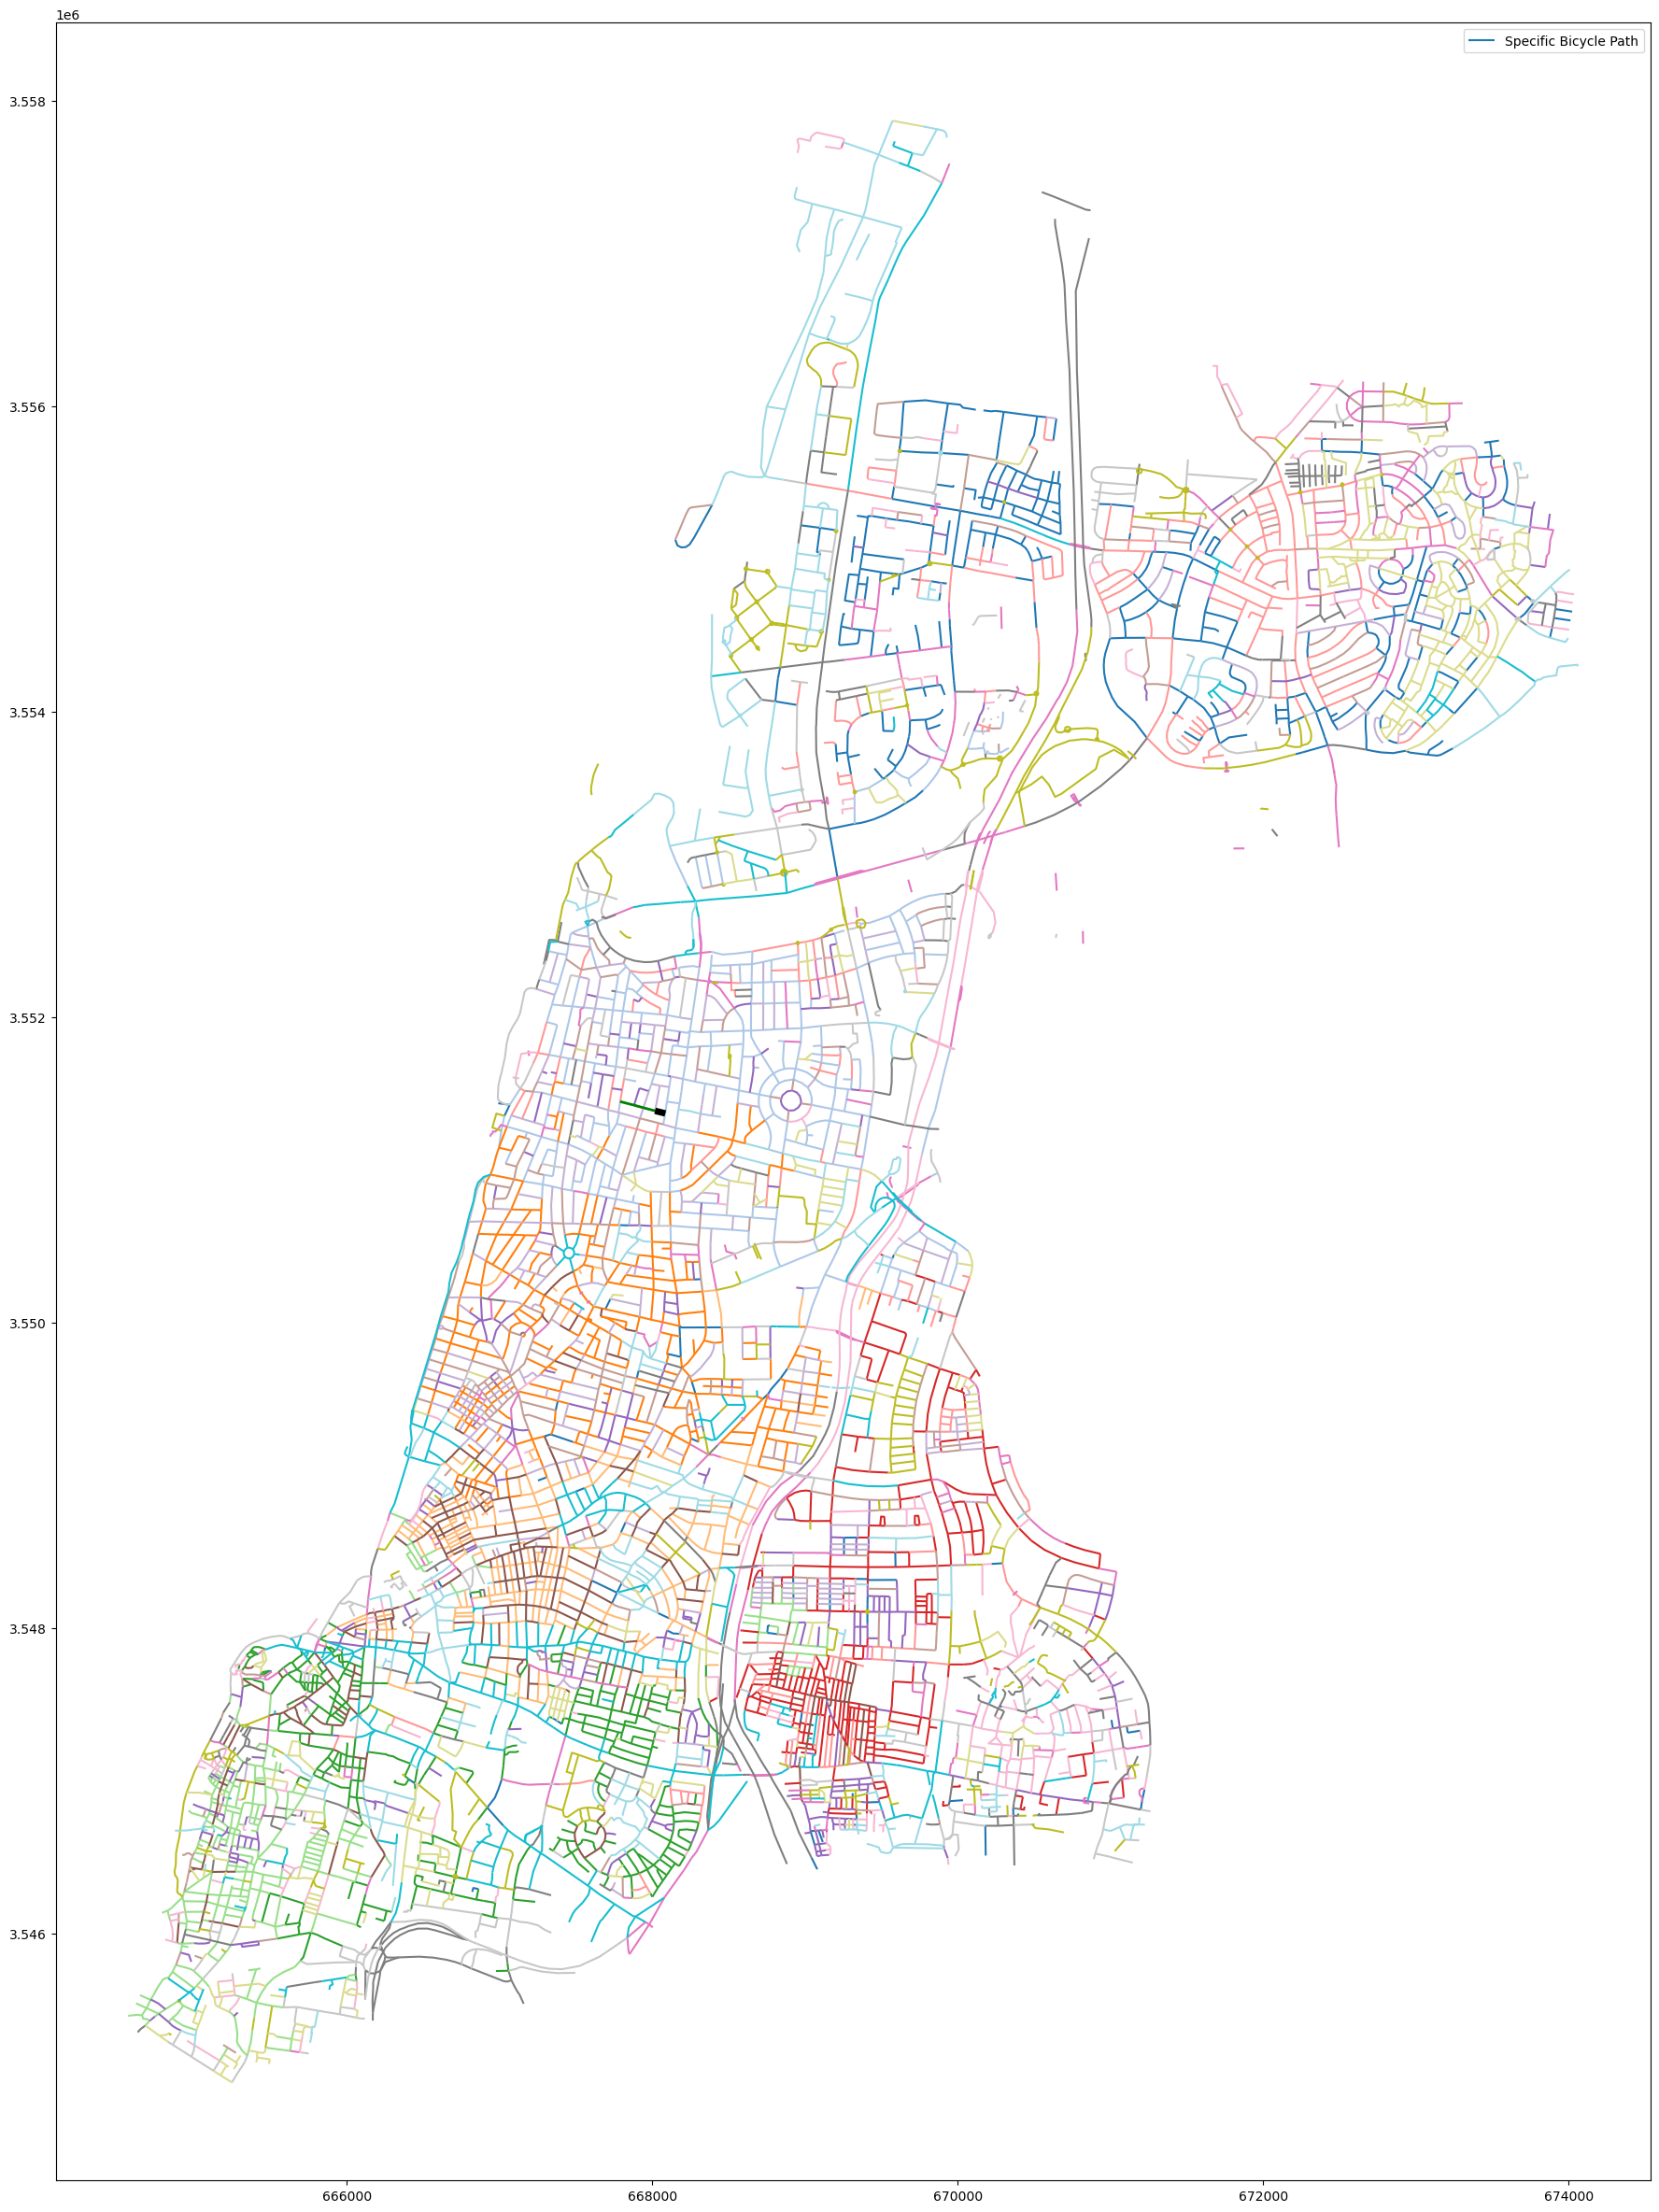

In [151]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_streets[ta_streets.shemangli == "AMSTERDAM"].plot(ax=ax, color='green', linewidth=2)
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].plot(ax=ax, color='black', linewidth=5)
# accidents_bp_distance.plot(ax=ax, color='black', marker='o', label='Accidents on big buff', markersize=20 )
# ta_streets[ta_streets.oidrechov == 4.0].plot()
# accidents_bp_distance['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

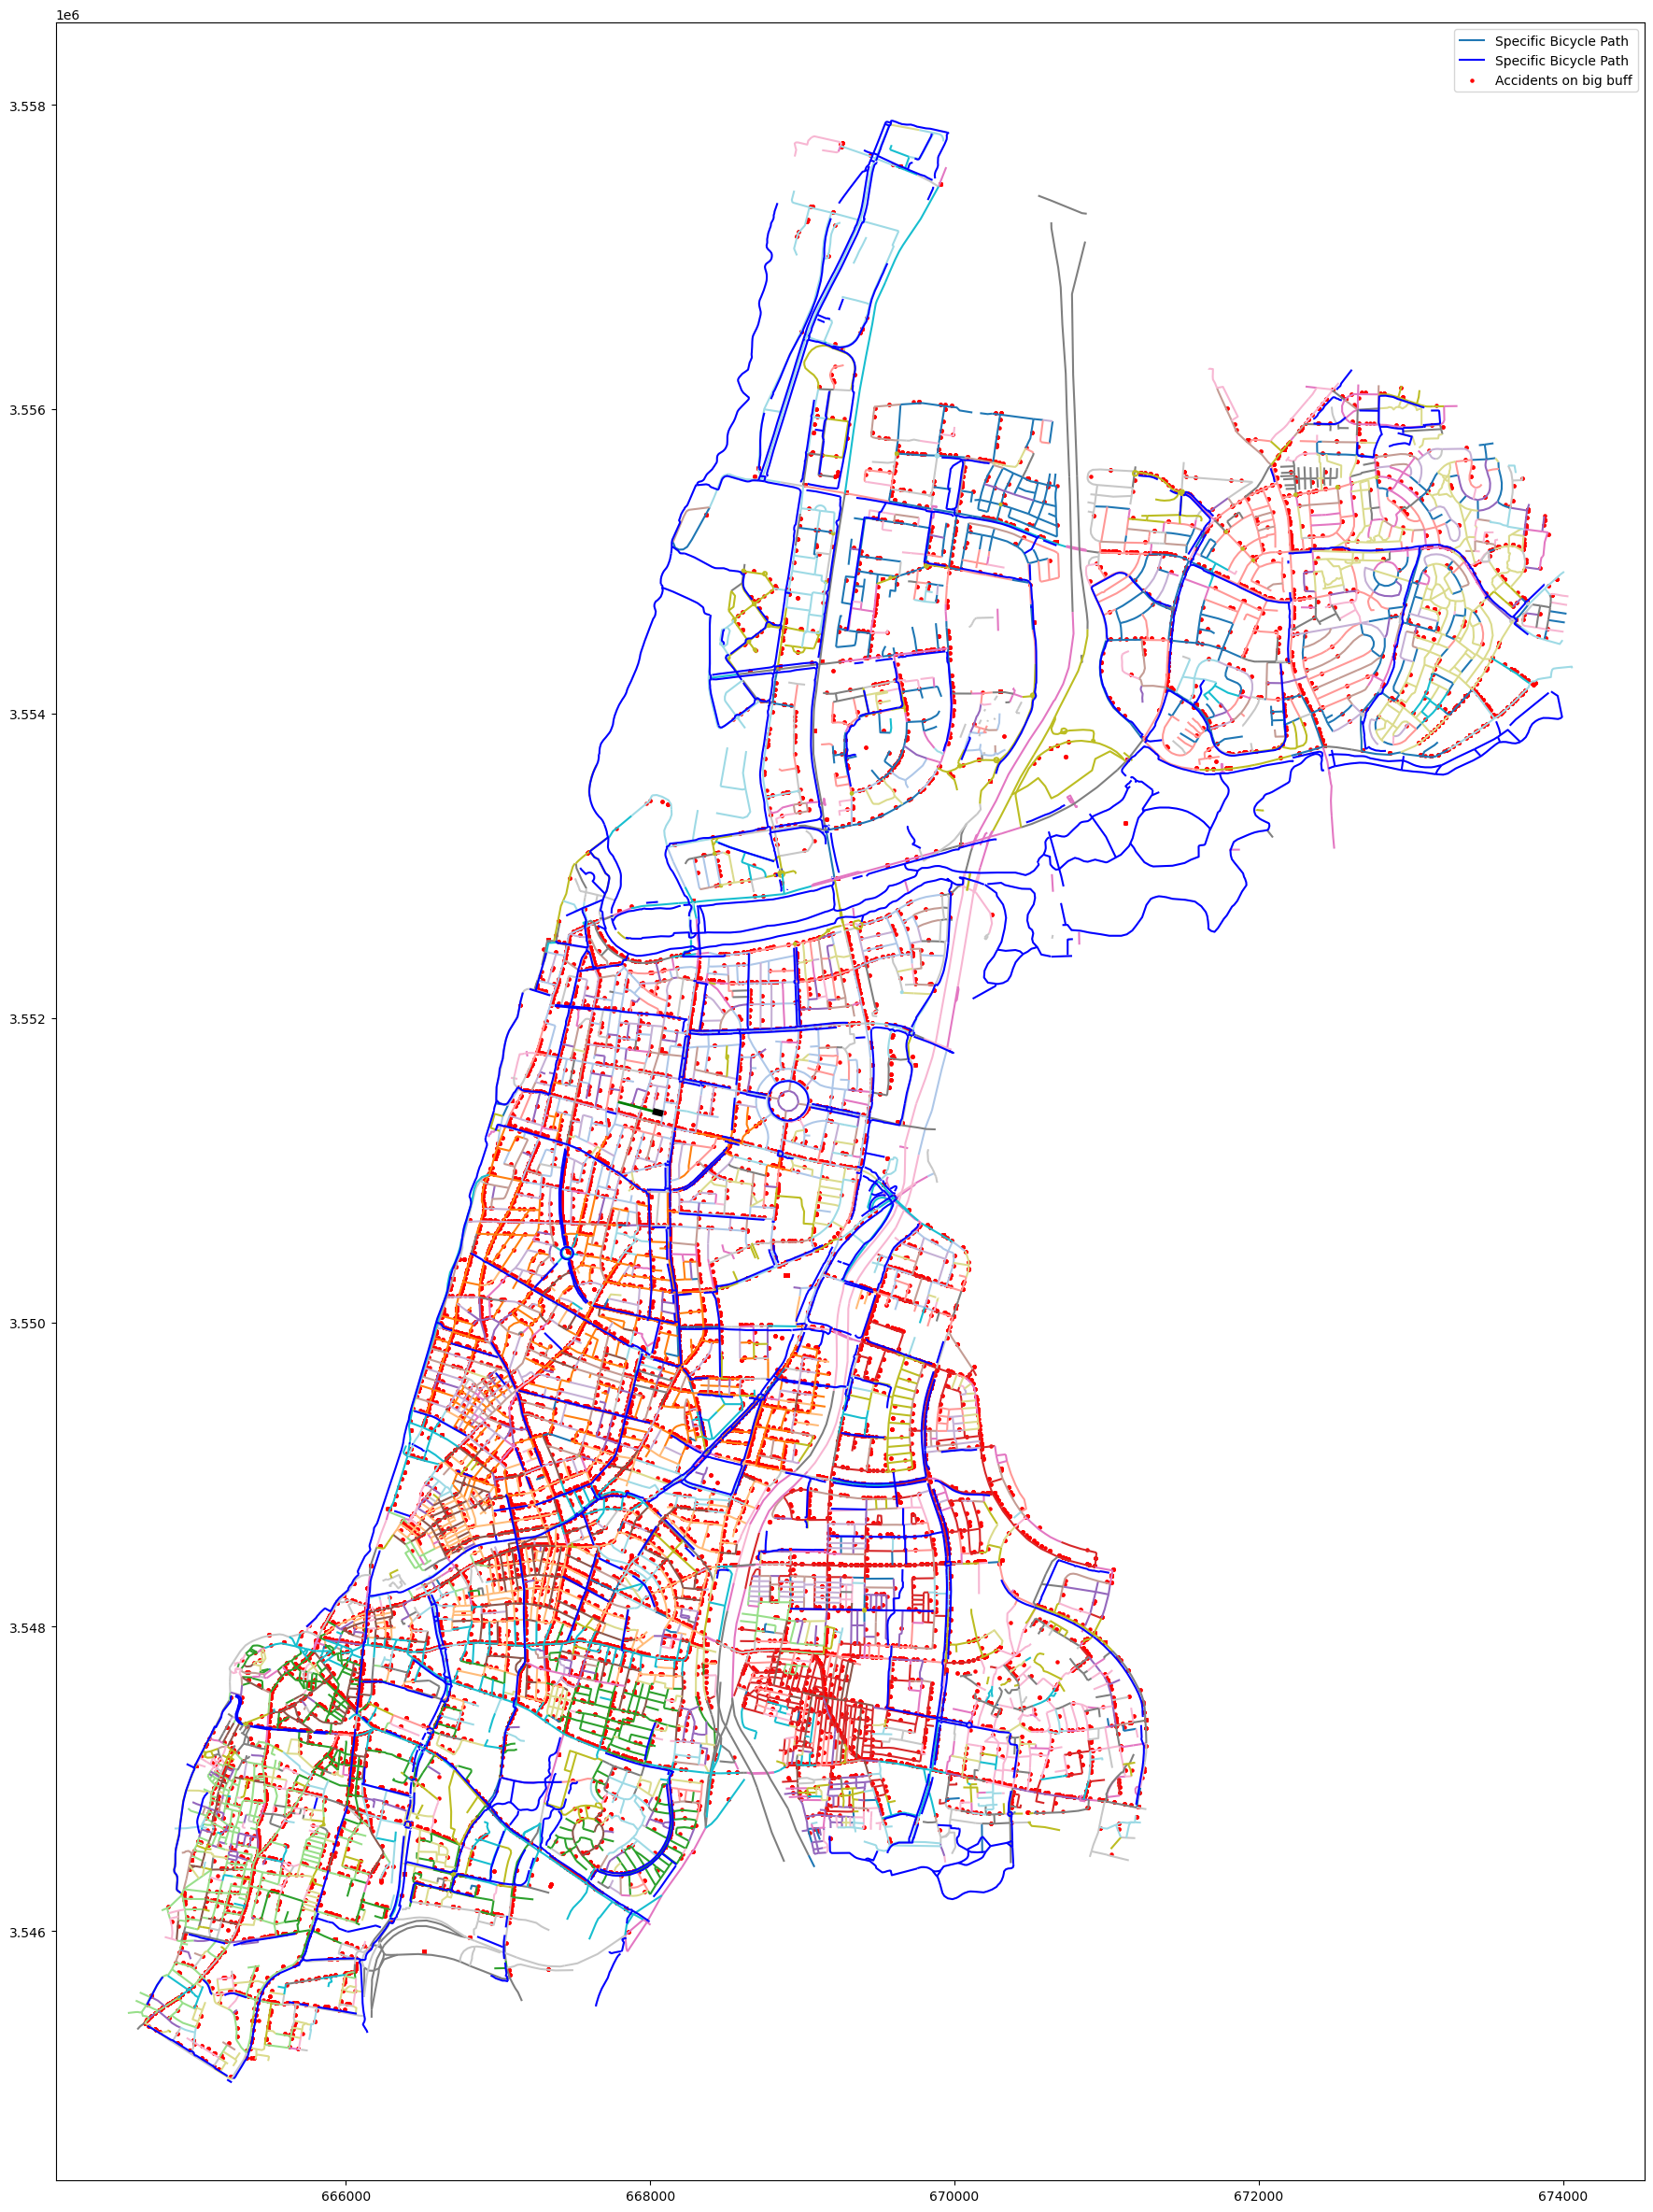

In [152]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_streets[ta_streets.shemangli == "AMSTERDAM"].plot(ax=ax, color='green', linewidth=2)
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].plot(ax=ax, color='black', linewidth=5)
bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )


plt.legend()
plt.show()

In [153]:
ta_streets.to_parquet('./csv_tables/ta_street_corrected.parquet')